In [1]:
from astropy.io import fits
import numpy as np
from astropy.convolution import convolve_fft, Gaussian2DKernel
import math
import matplotlib.pyplot as plt
import astropy
print(astropy.__version__)

3.2.1


In [2]:
rms = fits.open('/Users/hph/cmzoom_catalog/catalog_acc/noisemap_tests/CMZoom_noisemap_JySr_k14_final.fits')
region_mask = fits.open('/Users/hph/cmzoom_catalog/Continuum/CMZoom_Mask_new.fits')
rms[0].data.shape

(2800, 19000)

In [3]:
beam_ab_as2 = 3.25**2
beam_area_as2 = beam_ab_as2*np.pi/(2*np.sqrt(2))
beam_area_deg2 = beam_area_as2/(3600.**2)
deg2_per_pix = (1.388888888889E-04)**2
beam_area_sr = beam_area_deg2*3.0462e-4
print(beam_area_deg2/deg2_per_pix)
print(beam_area_sr)
conv=beam_area_sr*1000.


46.92795103429023
2.757560270846408e-10


In [4]:
avg_array = np.zeros_like(np.arange(1,35))
median_array = np.zeros_like(np.arange(1,35))
for i in range(1,35):
    cond = region_mask[0].data==i
    avg_array[i-1] = np.nanmean(rms[0].data[cond])
    median_array[i-1] = np.nanmedian(rms[0].data[cond])
print(median_array[-1])

19035076


[ 4.77040747  4.01564448  4.2086839   2.60883098  3.38082818  4.95315568
  4.06647265  5.2373275  26.2537502   2.62807627  3.02108679  3.33573876
  4.22423764  3.11829107  4.21163145  6.72259938  3.73925586  3.25589167
  3.61723437  3.32652823  2.90155621  3.54031995  8.55131049 17.85798182
  4.71320133  5.81078395  3.17396125  4.03446482  3.38535306  3.13713789
  3.36229269  5.94784131  3.38707819  5.65130596]
[ 4.44627557  3.85529731  3.38100659  2.14360712  2.89572617  4.31629934
  3.40129534  4.8395828  13.43010663  2.39888937  2.75083789  2.9488434
  3.79312149  2.82874917  3.60118041  6.5106362   3.66737482  3.10866856
  3.48890414  3.26592506  2.69421608  3.21167585  8.30945784 17.57184358
  4.23034426  5.79803575  2.9193979   3.75179228  3.06942048  2.71778081
  2.99366396  5.56140702  2.35331765  5.24903693]
[4.41378151 2.92675927]
2.1436071249281885 17.57184358146707


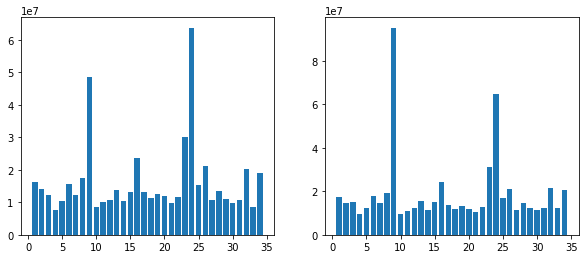

In [7]:
print(conv*avg_array)
print(conv*median_array)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.bar(np.arange(1,35),median_array)
ax2.bar(np.arange(1,35),avg_array)
print(np.percentile(conv*median_array,[75,25]))
print(np.min(median_array*conv),np.max(median_array*conv))

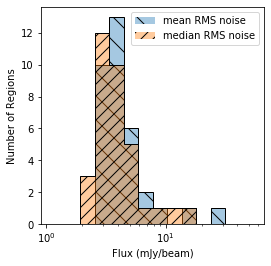

In [6]:
fig,ax = plt.subplots(figsize=(4,4))
conv=beam_area_sr*1000.
bins=np.logspace(6.6,8.3,15)
bins = bins*conv
ax.hist(avg_array*conv,alpha=0.4,bins=bins,hatch='\ ', label='mean RMS noise')
ax.hist(avg_array*conv,bins=bins,histtype='step',color='k')
ax.set_xscale('log')
ax.hist(median_array*conv,alpha=0.4,bins=bins,hatch='//',label='median RMS noise')
ax.hist(median_array*conv,bins=bins,histtype='step',color='k')
ax.set_xlabel('Flux (mJy/beam)')
ax.set_ylabel('Number of Regions')
ax.legend(loc='best')
plt.show()

In [12]:
print(median_array.shape,len(reg_names))

(34,) 34


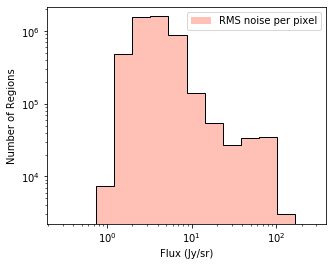

3.5645308602584347


In [13]:
fig,ax = plt.subplots(figsize=(5,4))
bins=np.logspace(6.,9.,15)
bins=bins*conv
ax.set_xscale('log')
ax.hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=0.4,bins=bins,label='RMS noise per pixel',color='tomato')
ax.hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=1,bins=bins,color='k',histtype='step')
ax.set_xlabel('Flux (Jy/sr)')
ax.set_ylabel('Number of Regions')
ax.set_yscale('log')
ax.legend(loc='best')
plt.show()
print(np.median(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))]))

In [ ]:
print(np.histogram(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],bins=bins))


In [19]:
#reg_names = ['20kms_cloud.continuum.pbcor.fits','G0.001-0.058.continuum.pbcor.fits','G0.014+0.021.continuum.pbcor.fits','G0.054+0.027.continuum.pbcor.fits','G0.068-0.075.continuum.pbcor.fits','G0.070-0.035.continuum.pbcor.fits','G0.106-0.082.continuum.pbcor.fits','G0.145-0.086.continuum.pbcor.fits','G0.212-0.001.continuum.pbcor.fits','G0.253+0.016.continuum.pbcor.fits','G0.316-0.201.continuum.pbcor.fits','G0.326-0.085.continuum.pbcor.fits','G0.340+0.055.continuum.pbcor.fits','G0.380+0.050.continuum.pbcor.fits','G0.412+0.052.continuum.pbcor.fits','G0.489+0.010.continuum.pbcor.fits','G0.619+0.012.continuum.pbcor.fits','G0.699-0.028.continuum.pbcor.fits','G0.714-0.100.continuum.pbcor.fits','G0.891-0.048.continuum.pbcor.fits','G1.038-0.074.continuum.pbcor.fits','G1.085-0.027.continuum.pbcor.fits','G1.602+0.018.continuum.pbcor.fits','G1.651-0.050.continuum.pbcor.fits','G1.670-0.130.continuum.pbcor.fits','G1.683-0.089.continuum.pbcor.fits','G359.137+0.031.continuum.pbcor.fits','G359.484-0.132.continuum.pbcor.fits','G359.611+0.018.continuum.pbcor.fits','G359.615-0.243.continuum.pbcor.fits','G359.648-0.133.continuum.pbcor.fits','G359.734+0.002.continuum.pbcor.fits','G359.865+0.022.continuum.pbcor.fits']
old_reg_names=['20kms_cloud.continuum.pbcor.fits',
'G0.001-0.058.continuum.pbcor.fits',
'G0.014+0.021.continuum.pbcor.fits',
'G0.054+0.027.continuum.pbcor.fits',
'G0.068-0.075.continuum.pbcor.fits',
'G0.070-0.035.continuum.pbcor.fits',
'G0.106-0.082.continuum.pbcor.fits',
'G0.145-0.086.continuum.pbcor.fits',
'G0.212-0.001.continuum.pbcor.fits',
'G0.253+0.016.continuum.pbcor.fits',
'G0.316-0.201.continuum.pbcor.fits',
'G0.326-0.085.continuum.pbcor.fits',
'G0.340+0.055.continuum.pbcor.fits',
'G0.380+0.050.continuum.pbcor.fits',
'G0.412+0.052.continuum.pbcor.fits',
'G0.489+0.010.continuum.pbcor.fits',
'G0.619+0.012.continuum.pbcor.fits',
'G0.699-0.028.continuum.pbcor.fits',
'G0.714-0.100.continuum.pbcor.fits',
'G0.891-0.048.continuum.pbcor.fits',
'G1.038-0.074.continuum.pbcor.fits',
'G1.085-0.027.continuum.pbcor.fits',
'G1.602+0.018.continuum.pbcor.fits',
'G1.651-0.050.continuum.pbcor.fits',
'G1.670-0.130.continuum.pbcor.fits',
'G1.683-0.089.continuum.pbcor.fits',
'G359.137+0.031.continuum.pbcor.fits',
'G359.484-0.132.continuum.pbcor.fits',
'G359.611+0.018.continuum.pbcor.fits',
'G359.615-0.243.continuum.pbcor.fits',
'G359.648-0.133.continuum.pbcor.fits',
'G359.734+0.002.continuum.pbcor.fits',
'G359.865+0.022.continuum.pbcor.fits']
print(len(reg_names))
      
      

33


In [19]:
bmin_array = np.zeros_like(reg_names,dtype='float')
bmaj_array = np.zeros_like(reg_names,dtype='float')
#path='/Users/hph/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Continuum_pbcor/'
path = '/Users/hph/cmzoom_catalog/Continuum/'
for i,name in enumerate(images):
    hdu = fits.open(path+name)
    bmaj_array[i] = hdu[0].header['BMAJ']
    bmin_array[i] = hdu[0].header['BMIN']
    

In [23]:
print(images[0])

G1.683-0.089.continuum_regrid.fits


In [25]:
for i in range(len(images)):

    ap = conv*median_array[i]
    bp = bmaj_array[i]*3600
    cp = bmin_array[i]*3600
    print(i+1, '\t', images[i],'\t', "%.2f"%ap,'\t',"%.2f"%bp,'\t', "%.2f"%cp)
#     print(reg_names[i],'\t',
#           conv*median_array[i],'\t',
#           bmaj_array[i]*3600,'\t',
#           bmin_array[i]*3600)

1 	 G1.683-0.089.continuum_regrid.fits 	 4.45 	 5.00 	 2.46
2 	 G1.670-0.130.continuum_regrid.fits 	 3.86 	 4.87 	 2.52
3 	 G1.651-0.050.continuum_regrid.fits 	 3.38 	 3.11 	 2.96
4 	 G1.602+0.018.continuum_regrid.fits 	 2.14 	 4.57 	 2.51
5 	 G1.085-0.027.continuum_regrid.fits 	 2.90 	 3.18 	 2.97
6 	 G1.038-0.074.continuum_regrid.fits 	 4.32 	 3.72 	 2.54
7 	 G0.891-0.048.continuum_regrid.fits 	 3.40 	 3.72 	 2.69
8 	 G0.714-0.100.continuum_regrid.fits 	 4.84 	 3.35 	 2.82
9 	 G0.699-0.028.continuum_regrid.fits 	 13.43 	 3.05 	 2.98
10 	 G0.619+0.012.continuum_regrid.fits 	 2.40 	 6.46 	 3.22
11 	 G0.489+0.010.continuum_regrid.fits 	 2.75 	 4.02 	 2.98
12 	 G0.412+0.052.continuum_regrid.fits 	 2.95 	 2.99 	 2.92
13 	 G0.380+0.050.continuum_regrid.fits 	 3.79 	 3.04 	 2.98
14 	 G0.340+0.055.continuum_regrid.fits 	 2.83 	 3.01 	 2.92
15 	 G0.326-0.085.continuum_regrid.fits 	 3.60 	 3.11 	 2.97
16 	 G0.316-0.201.continuum_regrid.fits 	 6.51 	 3.47 	 3.13
17 	 G0.253+0.016.continuum_regr

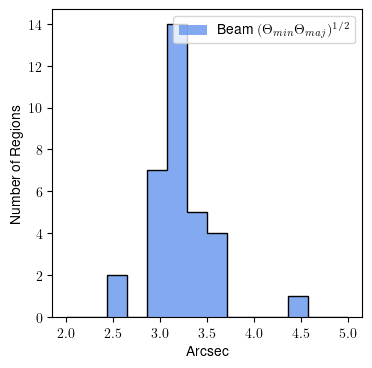

In [150]:
fig,ax = plt.subplots(figsize=(4,4))
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
bins=np.linspace(2,5,15)
beam_theta = ((bmaj_array*3600)*(bmin_array*3600))**0.5
ax.hist(beam_theta,alpha=0.8,bins=bins, 
        label='Beam $ (\Theta_{min} \Theta_{maj})^{1/2}$',color='cornflowerblue')
ax.hist(((bmaj_array*3600)*(bmin_array*3600))**0.5,bins=bins,histtype='step',color='k')
#ax.set_xscale('log')
ax.set_xlabel('Arcsec')
ax.set_ylabel('Number of Regions')
ax.legend(loc='best')
plt.show()

In [138]:
print(np.min(beam_theta),np.max(beam_theta))
print(np.percentile(beam_theta,[25,75]))
print(np.median(beam_theta),np.mean(beam_theta))

2.561945483728625 4.382642777255319
[3.06022784 3.29976859]
3.1441262470848583 3.2079885552040914


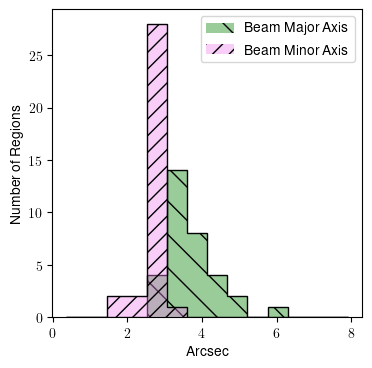

In [151]:
fig,ax = plt.subplots(figsize=(4,4))
bins=np.linspace(0.0001*3600,0.0022*3600,15)
ax.hist(bmaj_array*3600,alpha=0.4,bins=bins,hatch='\ ', label='Beam Major Axis',color='green')
ax.hist(bmaj_array*3600,bins=bins,histtype='step',color='k')
#ax.set_xscale('log')
ax.hist(bmin_array*3600,alpha=0.4,bins=bins,hatch='//',label='Beam Minor Axis',color='violet')
ax.hist(bmin_array*3600,bins=bins,histtype='step',color='k')
ax.set_xlabel('Arcsec')
ax.set_ylabel('Number of Regions')
ax.legend(loc='best')
plt.show()

In [106]:
#print(np.min(bmin_array),np.max(bmin_array))
#print(np.min(bmaj_array),np.max(bmaj_array))
print(np.percentile(bmin_array*3600,[25,75]))
print(np.min(bmin_array)*3600,np.max(bmin_array)*3600)
print(np.percentile(bmaj_array*3600,[25,75]))
print(np.min(bmaj_array)*3600,np.max(bmaj_array)*3600)

[3.26765347 4.06791544]
2.99056768417368 6.2929320335388
[2.70823503 2.97743225]
1.63229286670668 3.13176035881044


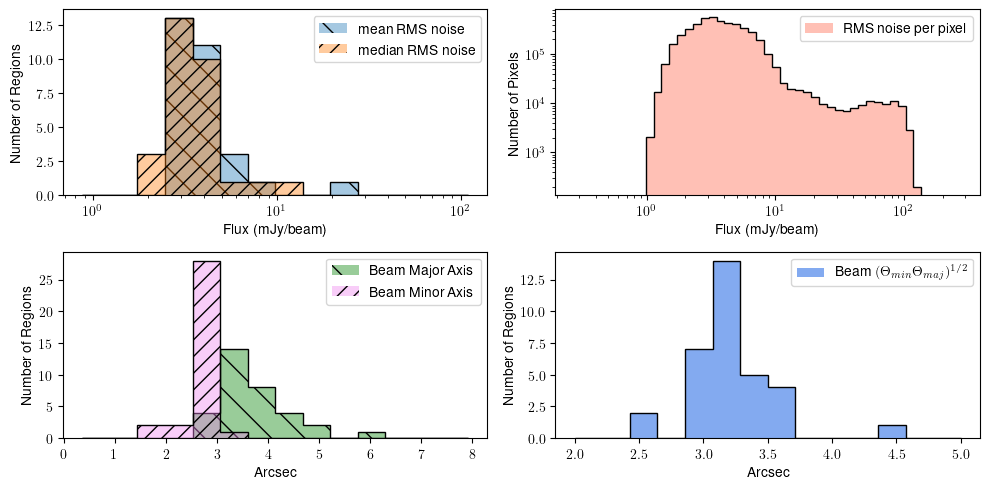

In [152]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
bins=np.logspace(6.5,8.6,15)
bins= bins*conv
axes[0][0].hist(conv*avg_array,alpha=0.4,bins=bins,hatch='\ ', label='mean RMS noise')
axes[0][0].hist(conv*avg_array,bins=bins,histtype='step',color='k')
axes[0][0].set_xscale('log')
axes[0][0].hist(conv*median_array,alpha=0.4,bins=bins,hatch='//',label='median RMS noise')
axes[0][0].hist(conv*median_array,bins=bins,histtype='step',color='k')
axes[0][0].set_xlabel('Flux (mJy/beam)')
axes[0][0].set_ylabel('Number of Regions')
axes[0][0].legend(loc='best')

bins=np.logspace(6.,9.,50)
bins=bins*conv
axes[0][1].set_xscale('log')
axes[0][1].hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=0.4,bins=bins,label='RMS noise per pixel',color='tomato')
axes[0][1].hist(conv*rms[0].data[np.logical_not(np.isnan(rms[0].data))],
        alpha=1,bins=bins,color='k',histtype='step')
axes[0][1].set_xlabel('Flux (mJy/beam)')
axes[0][1].set_ylabel('Number of Pixels')
axes[0][1].set_yscale('log')
axes[0][1].legend(loc='best')

bins=np.linspace(0.0001*3600,0.0022*3600,15)
axes[1][0].hist(bmaj_array*3600,alpha=0.4,bins=bins,hatch='\ ', label='Beam Major Axis',color='green')
axes[1][0].hist(bmaj_array*3600,bins=bins,histtype='step',color='k')
#axes[1][0].set_xscale('log')
axes[1][0].hist(bmin_array*3600,alpha=0.4,bins=bins,hatch='//',label='Beam Minor Axis',color='violet')
axes[1][0].hist(bmin_array*3600,bins=bins,histtype='step',color='k')
axes[1][0].set_xlabel('Arcsec')
axes[1][0].set_ylabel('Number of Regions')
axes[1][0].legend(loc='best')

bins=np.linspace(2,5,15)
beam_theta = ((bmaj_array*3600)*(bmin_array*3600))**0.5
axes[1][1].hist(beam_theta,alpha=0.8,bins=bins, 
        label='Beam $ (\Theta_{min} \Theta_{maj})^{1/2}$',color='cornflowerblue')
axes[1][1].hist(((bmaj_array*3600)*(bmin_array*3600))**0.5,bins=bins,histtype='step',color='k')
#axes[1][1].set_xscale('log')
axes[1][1].set_xlabel('Arcsec')
axes[1][1].set_ylabel('Number of Regions')
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.savefig('/Users/hph/cmzoom_catalog/rms_fig.pdf')
plt.show()

In [79]:
hist_arr = []
conv=beam_area_sr*1000.
bins=np.logspace(6.,9.,100)
print(bins*conv)

for i in range(1,30):
    cond = region_mask[0].data==i
    temp_rms_data = rms[0].data[cond]
    hist_arr.append(np.histogram(temp_rms_data[np.logical_not(np.isnan(temp_rms_data))],bins=bins))

[  0.27575603   0.29568415   0.31705242   0.33996492   0.36453324
   0.39087704   0.41912464   0.44941362   0.48189149   0.51671645
   0.55405811   0.59409835   0.63703219   0.68306873   0.73243221
   0.78536306   0.84211906   0.90297667   0.96823228   1.03820374
   1.11323184   1.19368201   1.2799461    1.37244424   1.47162698
   1.57797737   1.69201341   1.81429052   1.94540426   2.08599322
   2.23674215   2.3983853    2.57170994   2.75756027   2.95684149
   3.17052421   3.39964919   3.64533239   3.90877044   4.19124642
   4.49413615   4.81891489   5.16716448   5.5405811    5.94098351
   6.37032188   6.83068735   7.32432215   7.85363056   8.42119062
   9.02976668   9.68232283  10.3820374   11.13231841  11.93682013
  12.79946096  13.72444245  14.71626978  15.77977371  16.92013412
  18.14290521  19.45404257  20.85993218  22.36742153  23.98385295
  25.71709938  27.57560271  29.56841491  31.70524212  33.99649189
  36.45332391  39.08770437  41.91246418  44.94136153  48.18914888
  51.67164

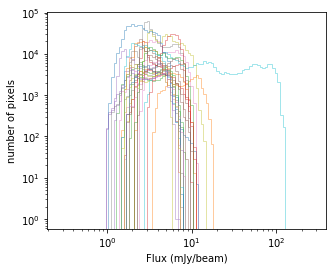

In [90]:
fig,ax = plt.subplots(figsize=(5,4))
ax.set_xscale('log')
for i in range(len(hist_arr)):
    cond = region_mask[0].data==i
    temp_rms_data = rms[0].data[cond]
    ax.hist(conv*temp_rms_data[np.logical_not(np.isnan(temp_rms_data))],bins=bins*conv,alpha=0.4,histtype='step')
ax.set_xlabel('Flux (mJy/beam)')
ax.set_ylabel('number of pixels')
ax.set_yscale('log')
#ax.legend(loc='best')
plt.show()

In [ ]:
# avg_array = np.zeros_like(np.arange(1,30))
# median_array = np.zeros_like(np.arange(1,30))
# for i in range(1,30):
#     cond = region_mask[0].data==i
#     avg_array[i-1] = np.nanmean(rms[0].data[cond])
#     median_array[i-1] = np.nanmedian(rms[0].data[cond])


In [9]:
reg_names=np.array(['G0.001-0.058.continuum_regrid.fits',
'G0.014+0.021.continuum_regrid.fits',
'G0.054+0.027.continuum_regrid.fits',
'G0.068-0.075.continuum_regrid.fits',
'G0.070-0.035.continuum_regrid.fits',
'G0.106-0.082.continuum_regrid.fits',
'G0.145-0.086.continuum_regrid.fits',
'G0.212-0.001.continuum_regrid.fits',
'G0.253+0.016.continuum_regrid.fits',
'G0.316-0.201.continuum_regrid.fits',
'G0.326-0.085.continuum_regrid.fits',
'G0.340+0.055.continuum_regrid.fits',
'G0.380+0.050.continuum_regrid.fits',
'G0.412+0.052.continuum_regrid.fits',
'G0.489+0.010.continuum_regrid.fits',
'G0.619+0.012.continuum_regrid.fits',
'G0.699-0.028.continuum_regrid.fits',
'G0.714-0.100.continuum_regrid.fits',
'G0.891-0.048.continuum_regrid.fits',
'G1.038-0.074.continuum_regrid.fits',
'G1.085-0.027.continuum_regrid.fits',
'G1.602+0.018.continuum_regrid.fits',
'G1.651-0.050.continuum_regrid.fits',
'G1.670-0.130.continuum_regrid.fits',
'G1.683-0.089.continuum_regrid.fits',
'G359.137+0.031.continuum_regrid.fits',
'G359.484-0.132.continuum_regrid.fits',
'G359.611+0.018.continuum_regrid.fits',
'G359.615-0.243.continuum_regrid.fits',
'G359.648-0.133.continuum_regrid.fits',
'G359.734+0.002.continuum_regrid.fits',
'G359.863-0.069.continuum_regrid.fits',
'G359.865+0.022.continuum_regrid.fits',
'G359.889-0.093.continuum_regrid.fits'])

# ,
# 'G359.948-0.052.continuum_regrid.fits'
# 'G0.393-0.034.continuum_regrid.fits',
# 'G1.127-0.106.continuum_regrid.fits',


In [18]:
# images = np.array(['G1.683-0.089.continuum.pbcor.fits','G1.670-0.130.continuum.pbcor.fits',\
#                       'G1.651-0.050.continuum.pbcor.fits','G1.602+0.018.continuum.pbcor.fits',\
#                       'G1.085-0.027.continuum.pbcor.fits',\
#                       'G1.038-0.074.continuum.pbcor.fits','G0.891-0.048.continuum.pbcor.fits',\
#                       'G0.714-0.100.continuum.pbcor.fits','G0.699-0.028.continuum.pbcor.fits',\
#                       'G0.619+0.012.continuum.pbcor.fits',\
#                       'G0.489+0.010.continuum.pbcor.fits','G0.412+0.052.continuum.pbcor.fits',\
#                       'G0.380+0.050.continuum.pbcor.fits',\
#                       'G0.340+0.055.continuum.pbcor.fits','G0.326-0.085.continuum.pbcor.fits',\
#                       'G0.316-0.201.continuum.pbcor.fits',\
#                       'G0.253+0.016.continuum.pbcor.fits',\
#                       'G0.212-0.001.continuum.pbcor.fits',\
#                       'G0.145-0.086.continuum.pbcor.fits',\
#                       'G0.106-0.082.continuum.pbcor.fits','G0.070-0.035.continuum.pbcor.fits',\
#                       'G0.068-0.075.continuum.pbcor.fits','G0.054+0.027.continuum.pbcor.fits',\
#                       'G0.014+0.021.continuum.pbcor.fits','G0.001-0.058.continuum.pbcor.fits',\
#                       'G359.889-0.093.continuum.pbcor.fits','G359.865+0.022.continuum.pbcor.fits',\
#                       'G359.863-0.069.continuum.pbcor.fits','G359.734+0.002.continuum.pbcor.fits',\
#                       'G359.648-0.133.continuum.pbcor.fits',\
#                       'G359.611+0.018.continuum.pbcor.fits',\
#                       'G359.615-0.243.continuum.pbcor.fits','G359.484-0.132.continuum.pbcor.fits',\
#                       'G359.137+0.031.continuum.pbcor.fits'])
images = np.array(['G1.683-0.089.continuum_regrid.fits','G1.670-0.130.continuum_regrid.fits',\
                      'G1.651-0.050.continuum_regrid.fits','G1.602+0.018.continuum_regrid.fits',\
                      'G1.085-0.027.continuum_regrid.fits',\
                      'G1.038-0.074.continuum_regrid.fits','G0.891-0.048.continuum_regrid.fits',\
                      'G0.714-0.100.continuum_regrid.fits','G0.699-0.028.continuum_regrid.fits',\
                      'G0.619+0.012.continuum_regrid.fits',\
                      'G0.489+0.010.continuum_regrid.fits','G0.412+0.052.continuum_regrid.fits',\
                      'G0.380+0.050.continuum_regrid.fits',\
                      'G0.340+0.055.continuum_regrid.fits','G0.326-0.085.continuum_regrid.fits',\
                      'G0.316-0.201.continuum_regrid.fits',\
                      'G0.253+0.016.continuum_regrid.fits',\
                      'G0.212-0.001.continuum_regrid.fits',\
                      'G0.145-0.086.continuum_regrid.fits',\
                      'G0.106-0.082.continuum_regrid.fits','G0.070-0.035.continuum_regrid.fits',\
                      'G0.068-0.075.continuum_regrid.fits','G0.054+0.027.continuum_regrid.fits',\
                      'G0.014+0.021.continuum_regrid.fits','G0.001-0.058.continuum_regrid.fits',\
                      'G359.889-0.093.continuum_regrid.fits','G359.865+0.022.continuum_regrid.fits',\
                      'G359.863-0.069.continuum_regrid.fits','G359.734+0.002.continuum_regrid.fits',\
                      'G359.648-0.133.continuum_regrid.fits',\
                      'G359.611+0.018.continuum_regrid.fits',\
                      'G359.615-0.243.continuum_regrid.fits','G359.484-0.132.continuum_regrid.fits',\
                      'G359.137+0.031.continuum_regrid.fits'])

In [11]:
print(len(reg_names),len(images))
for i in range(len(images)):
    print(images[i],'\t',reg_names[i])
    
missing1 = np.argwhere(np.logical_not(np.isin(images,reg_names))).T
missing2 = np.argwhere(np.logical_not(np.isin(reg_names,images))).T
print(missing1[0], missing2[0])
#print(images[missing1[0][0]],images[missing1[0][1]])
print(reg_names[missing2])

34 34
G1.683-0.089.continuum_regrid.fits 	 G0.001-0.058.continuum_regrid.fits
G1.670-0.130.continuum_regrid.fits 	 G0.014+0.021.continuum_regrid.fits
G1.651-0.050.continuum_regrid.fits 	 G0.054+0.027.continuum_regrid.fits
G1.602+0.018.continuum_regrid.fits 	 G0.068-0.075.continuum_regrid.fits
G1.085-0.027.continuum_regrid.fits 	 G0.070-0.035.continuum_regrid.fits
G1.038-0.074.continuum_regrid.fits 	 G0.106-0.082.continuum_regrid.fits
G0.891-0.048.continuum_regrid.fits 	 G0.145-0.086.continuum_regrid.fits
G0.714-0.100.continuum_regrid.fits 	 G0.212-0.001.continuum_regrid.fits
G0.699-0.028.continuum_regrid.fits 	 G0.253+0.016.continuum_regrid.fits
G0.619+0.012.continuum_regrid.fits 	 G0.316-0.201.continuum_regrid.fits
G0.489+0.010.continuum_regrid.fits 	 G0.326-0.085.continuum_regrid.fits
G0.412+0.052.continuum_regrid.fits 	 G0.340+0.055.continuum_regrid.fits
G0.380+0.050.continuum_regrid.fits 	 G0.380+0.050.continuum_regrid.fits
G0.340+0.055.continuum_regrid.fits 	 G0.412+0.052.continuu

array(['G1.683-0.089.continuum.pbcor.fits',
       'G1.670-0.130.continuum.pbcor.fits',
       'G1.651-0.050.continuum.pbcor.fits',
       'G1.602+0.018.continuum.pbcor.fits',
       'G1.085-0.027.continuum.pbcor.fits',
       'G1.038-0.074.continuum.pbcor.fits',
       'G0.891-0.048.continuum.pbcor.fits',
       'G0.714-0.100.continuum.pbcor.fits',
       'G0.699-0.028.continuum.pbcor.fits',
       'G0.619+0.012.continuum.pbcor.fits',
       'G0.489+0.010.continuum.pbcor.fits',
       'G0.412+0.052.continuum.pbcor.fits',
       'G0.380+0.050.continuum.pbcor.fits',
       'G0.340+0.055.continuum.pbcor.fits',
       'G0.326-0.085.continuum.pbcor.fits',
       'G0.316-0.201.continuum.pbcor.fits',
       'G0.253+0.016.continuum.pbcor.fits',
       'G0.212-0.001.continuum.pbcor.fits',
       'G0.145-0.086.continuum.pbcor.fits',
       'G0.106-0.082.continuum.pbcor.fits',
       'G0.070-0.035.continuum.pbcor.fits',
       'G0.068-0.075.continuum.pbcor.fits',
       'G0.054+0.027.continuum.p